In [54]:
! git clone https://github.com/dwgoon/jpegio
# Once downloaded install the package
!pip install jpegio/.
import jpegio as jio

Cloning into 'jpegio'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 1239 (delta 38), reused 43 (delta 12), pack-reused 1154
Receiving objects: 100% (1239/1239), 231.39 MiB | 45.00 MiB/s, done.
Resolving deltas: 100% (613/613), done.
Processing ./jpegio
  Created wheel for jpegio: filename=jpegio-0.2.1-cp37-cp37m-linux_x86_64.whl size=1029394 sha256=74cf959855f33e88763339ec49adc7addce77d05f0c28708491b705ca4efa7f1
  Stored in directory: /tmp/pip-ephem-wheel-cache-d6mhzs_8/wheels/63/fa/8a/228404b42bb02e7b206de3032473b06abde4aa1058d2d0254e
Successfully built jpegio
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [139]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, jpegio
from PIL import Image

## lets try reading a sample image

In [56]:
img = jpegio.read('../input/alaska2-image-steganalysis/JUNIWARD/00001.jpg')

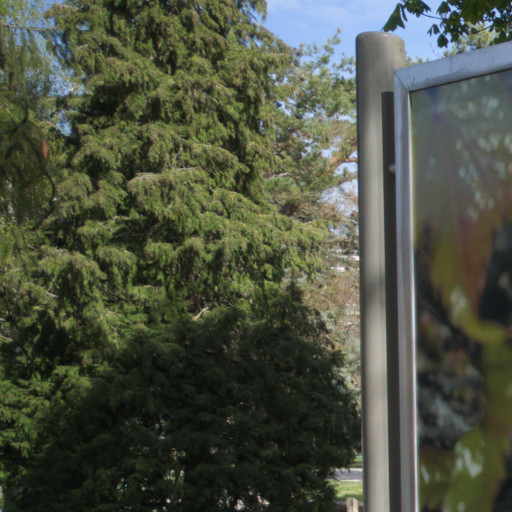

In [140]:
Image.open('../input/alaska2-image-steganalysis/JUNIWARD/00001.jpg')

### DCT coefficients of the image

In [130]:
img.coef_arrays

[array([[-48, -16, -14, ...,  -1,   1,  -1],
        [ 13,  -2,   4, ...,  -1,   0,   1],
        [  3,  -1,   1, ...,   3,   0,  -1],
        ...,
        [  0,  -1,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=int32),
 array([[-51,  -7,   1, ...,   0,   0,   0],
        [ -4,   0,   0, ...,   0,   0,   0],
        [ -5,   2,   1, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=int32),
 array([[-8,  3,  2, ...,  0,  0,  0],
        [ 0, -2, -1, ...,  0,  0,  0],
        [ 1,  0, -1, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=int32)]

In [109]:
for i in img.coef_arrays:
    print(i.shape)

(512, 512)
(512, 512)
(512, 512)


### a function to convert out DCT coefficients into one hot encoding

In [132]:
def get_strides(image, stride=8, window=8):
    im_h, im_w = image.shape
    
    out_shape = (1 + (im_h - window)//stride, 1+ (im_w - window)//stride, window, window)
    out_strides = (image.strides[0]*stride, image.strides[1] * stride, image.strides[0], image.strides[1])
    out = np.lib.stride_tricks.as_strided(image, shape=out_shape, strides = out_strides, writeable=False)
    return out

In [137]:
out = get_strides(np.arange(512*512).reshape(512, 512))

In [138]:
out.shape

(64, 64, 8, 8)

In [105]:
out[0][0]

array([[   0,    1,    2,    3,    4,    5,    6,    7],
       [ 512,  513,  514,  515,  516,  517,  518,  519],
       [1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031],
       [1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543],
       [2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055],
       [2560, 2561, 2562, 2563, 2564, 2565, 2566, 2567],
       [3072, 3073, 3074, 3075, 3076, 3077, 3078, 3079],
       [3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591]])

In [107]:
np.transpose(out, (2, 3, 0, 1)).reshape(-1, 64, 64)[:,0,0]

array([   0,    1,    2,    3,    4,    5,    6,    7,  512,  513,  514,
        515,  516,  517,  518,  519, 1024, 1025, 1026, 1027, 1028, 1029,
       1030, 1031, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 2048,
       2049, 2050, 2051, 2052, 2053, 2054, 2055, 2560, 2561, 2562, 2563,
       2564, 2565, 2566, 2567, 3072, 3073, 3074, 3075, 3076, 3077, 3078,
       3079, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591])

### summary of the conversion process

In [89]:
a = np.arange(4).reshape(2, 2)
b = np.lib.stride_tricks.as_strided(a, shape=(4, 2, 2), strides=(0,)+a.strides)

In [99]:
b

array([[[0, 1],
        [2, 3]],

       [[0, 1],
        [2, 3]],

       [[0, 1],
        [2, 3]],

       [[0, 1],
        [2, 3]]])

In [98]:
np.transpose(b, (1, 2, 0)).reshape(-1, 2, 2)

array([[[0, 0],
        [0, 0]],

       [[1, 1],
        [1, 1]],

       [[2, 2],
        [2, 2]],

       [[3, 3],
        [3, 3]]])

In [133]:
def proc_dct(f):
    acc= []  # accumlator
    for channel in f.coef_arrays:
        out = get_strides(channel, 8)
        out = np.transpose(out, (2, 3, 0, 1)).reshape(-1, 64, 64)
        acc.append(out)
    return np.concatenate(acc, axis=0)

In [135]:
%time o = proc_dct(img)

CPU times: user 2.75 ms, sys: 1.82 ms, total: 4.57 ms
Wall time: 2.63 ms


In [136]:
o.shape # channel * 64(per MCU) * 512//8 * 512//8

(192, 64, 64)